# Beam Splitter QM
## AMCDawes
Based on paper (and book) by Ulf Leonhardt

arXiv:quant-ph/0305007v2 4 Jul 2003

Some cells refer to equation numbers from this paper.

In [101]:
from qutip import *
from numpy import sqrt, pi, cos, sin, exp, array, real, imag, linspace
from numpy import math
factorial = math.factorial
import matplotlib.pyplot as plt
%matplotlib inline

Define the anihilation operators for photons 1 and 2, and the quantum Stokes parameters:

In [30]:
# define max dimension, enlarge as needed
N = 7
a1 = tensor(destroy(N),identity(N))
a2 = tensor(identity(N),destroy(N))

# quantum Stokes, eqn 4.6:
Lt = 1/2*(a1.dag()*a1 + a2.dag()*a2)
Lx = 1/2*(a1.dag()*a2 + a2.dag()*a1)
Ly = 1j/2*(a2.dag()*a1 - a1.dag()*a2)
Lz = 1/2*(a1.dag()*a1 - a2.dag()*a2)

In [31]:
# the number operators, just to have:
n1 = a1.dag()*a1
n2 = a2.dag()*a2
# Note, can use this approach or form a tensor with n and identity.

In [32]:
def tp(n,m):
    """Create a two photon ket state |n,m>
    implemented using QuTiP tensor"""
    return tensor(fock(N,n),fock(N,m))

In [33]:
def Bmatrix(Φ,Θ,Ψ,Λ):
    """This is the classical matrix given in 4.4, mainly to confirm parameter choice"""
    a = exp(1j*Λ/2)
    b = array([[exp(1j*Ψ/2),0],[0,exp(-1j*Ψ/2)]])
    c = array([[cos(Θ/2),sin(Θ/2)],[-sin(Θ/2),cos(Θ/2)]])
    d = array([[exp(1j*Φ/2),0],[0,exp(-1j*Φ/2)]])
    return a * b @ c @ d

In [34]:
# Generate the perfect 50/50 BS as inm 4.23
# to check the angles:
Bmatrix(0,pi/2,0,0)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [-0.70710678+0.j,  0.70710678+0.j]])

In [35]:
def B(Φ,Θ,Ψ,Λ):
    """Create the B operator given in 4.12"""
    B = (-1j*Φ*Lz).expm() * (-1j*Θ*Ly).expm() * (-1j*Ψ*Lx).expm() * (-1j*Λ*Lt).expm()
    return B

In [36]:
# The B operator for a 50/50 BS
bs = B(0,pi/2,0,0) 

In [37]:
# Apply it to a |1,1> input state, a la Hong, Ou, Mandel:
out = bs.dag() * tp(1,1)

In [38]:
# Compare to the example expression from Ulf in 4.24 line 1:
out1 = 1/2 * (a1.dag() - a2.dag()) * (a1.dag() + a2.dag()) * tp(0,0)

In [39]:
# the right answer in any case (4.24 line 2)
testout = (1/sqrt(2)*(tp(2,0) - tp(0,2)))

In [40]:
testout == out1 == out

True

These all agree: so far so good.

Next, try a single photon input:

In [116]:
psi1 = bs.dag() * tp(1,0)

In [117]:
psi1 == (1/sqrt(2)*(tp(1,0) - tp(0,1))) ## sanity check

True

Note: this is different from van Enk (NotesBS.pdf) by the sign and a factor of i. It agrees with several other papers in the reference folder. TODO: sort this out.

Now to let the outputs interfere again after a phase shift in path 2:

In [125]:
def phaseshifter(phi):
    """ I believe this shifts one arm by phi 
    doesn't seem to be working though"""
    shifter = tensor(identity(N),exp(1j*phi)*identity(N))
    return shifter

In [138]:
def stateplot(state):
    plt.plot(real(state.full()),"bo")
    plt.plot(imag(state.full()),"ro")

In [149]:
philist = linspace(0,2*pi,20)

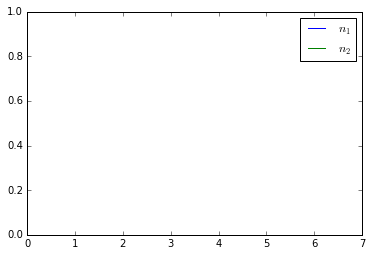

In [151]:
input2 = [phaseshifter(pi/8)*psi1 for phi in philist]
out2 = bs.dag() * input2
plt.plot(philist,expect(n1,out2),label="$n_1$")
plt.plot(philist,expect(n2,out2),label="$n_2$")
plt.legend()

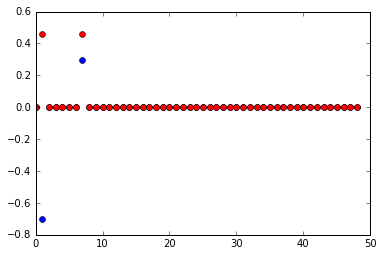

In [148]:
stateplot(test3[6])

In [127]:
expect(n2,out2)

1.0

In [128]:
expect(n1,out2)

0.0

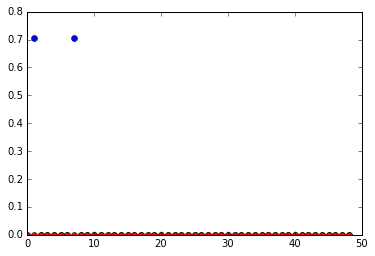

In [141]:
stateplot(psi3[0])

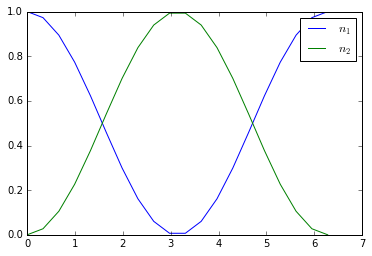

In [129]:
# Explore the phase-shifted version of the 1 photon output by hard-coding the state

psi3 = [1/sqrt(2)*(exp(1j*phi)*tp(0,1) + tp(1,0)) for phi in philist]
test3 = bs.dag()*psi3
plt.plot(philist,expect(n1,test3),label="$n_1$")
plt.plot(philist,expect(n2,test3),label="$n_2$")
plt.legend()

In [174]:
(tp(1,0)).full()

array([[ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j]])